In [1]:
import pandas as pd
import seaborn as sns

news_articles = pd.read_csv('Op-Ed Sentiments - Sheet1 (20).csv') 
sympathy_scores = pd.read_csv('Sympathy Scores - Sheet1 (2).csv')
word_counts = pd.read_csv('Sheet 1-Updated_Op_Ed_Sentiments (1).csv')

/Users/chrislele/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
news_articles.head(5)

,Article Link,Article,Polarity,Subjectivity,Source,Date,Author
0,https://www.nytimes.com/2023/11/10/opinion/isr...,I landed in Israel and went straight to a fune...,NaN,NaN,NYTimes,11/10/2023,Stephens
1,https://www.nytimes.com/2023/11/10/opinion/isr...,Israeli military operations have created an un...,NaN,NaN,NYTimes,11/10/2023,Guest
2,https://www.nytimes.com/2023/11/09/opinion/isr...,People warned me before I came to Tel Aviv a f...,NaN,NaN,NYTimes,11/9/2023,Friedman
3,https://www.nytimes.com/2023/11/08/opinion/isr...,My columns from Israel and the West Bank over ...,NaN,NaN,NYTimes,11/8/2023,Kristof
4,https://www.nytimes.com/2023/11/08/opinion/bid...,The Hamas terrorist attacks on Israel and Isra...,NaN,NaN,NYTimes,11/8/2023,Edsall


In [3]:
sympathy_scores.head()

,Article Link,SS (Human),SS (GPT),SS (Claude),Final Score
0,https://www.nytimes.com/2023/11/10/opinion/isr...,-0.80,-0.8,-0.80,-0.80
1,https://www.nytimes.com/2023/11/10/opinion/isr...,NaN,0.8,0.70,0.75
2,https://www.nytimes.com/2023/11/09/opinion/isr...,-0.50,-0.2,-0.65,-0.50
3,https://www.nytimes.com/2023/11/08/opinion/isr...,NaN,0.0,0.20,0.10
4,https://www.nytimes.com/2023/11/08/opinion/bid...,-0.35,-0.4,0.00,-0.35


In [4]:
word_counts.head()

,Article Link,Stance (human),Stance (Chat),Stance (Claude),Article,Polarity,Subjectivity,Words,Source,Date,Author
0,https://www.nytimes.com/2023/11/10/opinion/isr...,-0.8,-0.8,NaN,I landed in Israel and went straight to a fune...,NaN,NaN,1275,NYTimes,11/10,2673
1,https://www.nytimes.com/2023/11/10/opinion/isr...,NaN,NaN,NaN,Israeli military operations have created an un...,NaN,NaN,1444,NYTimes,11/10,Guest
2,https://www.nytimes.com/2023/11/09/opinion/isr...,NaN,NaN,NaN,People warned me before I came to Tel Aviv a f...,NaN,NaN,2412,NYTimes,11/9,Friedman
3,https://www.nytimes.com/2023/11/08/opinion/isr...,NaN,NaN,NaN,My columns from Israel and the West Bank over ...,NaN,NaN,1064,NYTimes,11/8,Kristof
4,https://www.nytimes.com/2023/11/08/opinion/bid...,NaN,NaN,NaN,The Hamas terrorist attacks on Israel and Isra...,NaN,NaN,2673,NYTimes,11/8,Edsall


In [5]:
from textblob import TextBlob

polarity = []
subjectivity = []

for index, row in news_articles.iterrows():
    if pd.notna(row['Article']):  # Assuming 'Article' is the column with text
        # Perform sentiment analysis
        analysis = TextBlob(row['Article'])
        # Append the results to the lists
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
    else:
        # Handle NaN value (e.g., append None or a default value)
        polarity.append(None)
        subjectivity.append(None)

# Add the lists as new columns to the DataFrame
news_articles['Polarity'] = polarity
news_articles['Subjectivity'] = subjectivity

# Save the updated DataFrame to a new CSV file
news_articles.to_csv('updated_news_articles.csv', index=False)



In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/chrislele/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from textblob import TextBlob
for index in range(2, 125):
    article = news_articles.loc[index, 'Article']
    if pd.notna(article):
        # Perform sentiment analysis
        analysis = TextBlob(article)
        polarity = analysis.sentiment.polarity
        subjectivity = analysis.sentiment.subjectivity

        # Assign values to the DataFrame
        news_articles.loc[index, 'Polarity'] = polarity
        news_articles.loc[index, 'Subjectivity'] = subjectivity

        # Print the results
        print(f'Article {index} - Polarity: {polarity}, Subjectivity: {subjectivity}')
    else:
        # Handle NaN value
        news_articles.loc[index, 'Polarity'] = None
        news_articles.loc[index, 'Subjectivity'] = None
        print(f'Article {index} - No content available for analysis.')



Article 2 - Polarity: 0.07473835795846666, Subjectivity: 0.39549238503042855
Article 3 - Polarity: -0.005551482567611586, Subjectivity: 0.43598601219568967
Article 4 - Polarity: 0.06468385150203329, Subjectivity: 0.42691304276531544
Article 5 - Polarity: 0.030784761585866547, Subjectivity: 0.4787882774070618
Article 6 - Polarity: 0.026490909090909096, Subjectivity: 0.42022683982684006
Article 7 - Polarity: -0.015373977873977873, Subjectivity: 0.4663258038258037
Article 8 - Polarity: 0.05171940735321017, Subjectivity: 0.4364017437961099
Article 9 - Polarity: 0.04147465437788018, Subjectivity: 0.372836661546339
Article 10 - Polarity: 0.043849990589121056, Subjectivity: 0.46101909362778926
Article 11 - Polarity: 0.0033461514844493607, Subjectivity: 0.4388122515782093
Article 12 - Polarity: 0.0784525449298177, Subjectivity: 0.42217220910402725
Article 13 - Polarity: 0.035373158587444296, Subjectivity: 0.44126072340358075
Article 14 - Polarity: 0.04722749255952382, Subjectivity: 0.435080748

KeyError: 124

In [8]:
for index in range(1, 125):
    article = news_articles.loc[index, 'Article']
    if pd.notna(article):
        # Perform sentiment analysis
        analysis = TextBlob(article)
        polarity = analysis.sentiment.polarity
        subjectivity = analysis.sentiment.subjectivity

        # Assign values to the DataFrame
        news_articles.loc[index, 'Polarity'] = polarity
        news_articles.loc[index, 'Subjectivity'] = subjectivity

        # Print the results
        print(f'Article {index} - Polarity: {polarity}, Subjectivity: {subjectivity}')
    else:
        # Handle NaN value
        news_articles.loc[index, 'Polarity'] = None
        news_articles.loc[index, 'Subjectivity'] = None
        print(f'Article {index} - No content available for analysis.')

Article 1 - Polarity: 0.03928348028118671, Subjectivity: 0.40482197466142444
Article 2 - Polarity: 0.07473835795846666, Subjectivity: 0.39549238503042855
Article 3 - Polarity: -0.005551482567611586, Subjectivity: 0.43598601219568967
Article 4 - Polarity: 0.06468385150203329, Subjectivity: 0.42691304276531544
Article 5 - Polarity: 0.030784761585866547, Subjectivity: 0.4787882774070618
Article 6 - Polarity: 0.026490909090909096, Subjectivity: 0.42022683982684006
Article 7 - Polarity: -0.015373977873977873, Subjectivity: 0.4663258038258037
Article 8 - Polarity: 0.05171940735321017, Subjectivity: 0.4364017437961099
Article 9 - Polarity: 0.04147465437788018, Subjectivity: 0.372836661546339
Article 10 - Polarity: 0.043849990589121056, Subjectivity: 0.46101909362778926
Article 11 - Polarity: 0.0033461514844493607, Subjectivity: 0.4388122515782093
Article 12 - Polarity: 0.0784525449298177, Subjectivity: 0.42217220910402725
Article 13 - Polarity: 0.035373158587444296, Subjectivity: 0.4412607234

KeyError: 124

In [9]:
merged_df = news_articles.merge(sympathy_scores[['Article Link', 'SS (Human)', 'SS (GPT)', 'SS (Claude)', 'Final Score']],
                               left_on='Article Link', right_on='Article Link', how='left')

In [10]:
merged_df.head()

,Article Link,Article,Polarity,Subjectivity,Source,Date,Author,SS (Human),SS (GPT),SS (Claude),Final Score
0,https://www.nytimes.com/2023/11/10/opinion/isr...,I landed in Israel and went straight to a fune...,0.035205,0.389367,NYTimes,11/10/2023,Stephens,-0.80,-0.8,-0.80,-0.80
1,https://www.nytimes.com/2023/11/10/opinion/isr...,Israeli military operations have created an un...,0.039283,0.404822,NYTimes,11/10/2023,Guest,NaN,0.8,0.70,0.75
2,https://www.nytimes.com/2023/11/09/opinion/isr...,People warned me before I came to Tel Aviv a f...,0.074738,0.395492,NYTimes,11/9/2023,Friedman,-0.50,-0.2,-0.65,-0.50
3,https://www.nytimes.com/2023/11/08/opinion/isr...,My columns from Israel and the West Bank over ...,-0.005551,0.435986,NYTimes,11/8/2023,Kristof,NaN,0.0,0.20,0.10
4,https://www.nytimes.com/2023/11/08/opinion/bid...,The Hamas terrorist attacks on Israel and Isra...,0.064684,0.426913,NYTimes,11/8/2023,Edsall,-0.35,-0.4,0.00,-0.35


In [11]:
finished_df = pd.merge(merged_df, word_counts[['Article', 'Words']], on='Article', how='left')

In [12]:
finished_df.head()

,Article Link,Article,Polarity,Subjectivity,Source,Date,Author,SS (Human),SS (GPT),SS (Claude),Final Score,Words
0,https://www.nytimes.com/2023/11/10/opinion/isr...,I landed in Israel and went straight to a fune...,0.035205,0.389367,NYTimes,11/10/2023,Stephens,-0.80,-0.8,-0.80,-0.80,1275.0
1,https://www.nytimes.com/2023/11/10/opinion/isr...,Israeli military operations have created an un...,0.039283,0.404822,NYTimes,11/10/2023,Guest,NaN,0.8,0.70,0.75,1444.0
2,https://www.nytimes.com/2023/11/09/opinion/isr...,People warned me before I came to Tel Aviv a f...,0.074738,0.395492,NYTimes,11/9/2023,Friedman,-0.50,-0.2,-0.65,-0.50,2412.0
3,https://www.nytimes.com/2023/11/08/opinion/isr...,My columns from Israel and the West Bank over ...,-0.005551,0.435986,NYTimes,11/8/2023,Kristof,NaN,0.0,0.20,0.10,1064.0
4,https://www.nytimes.com/2023/11/08/opinion/bid...,The Hamas terrorist attacks on Israel and Isra...,0.064684,0.426913,NYTimes,11/8/2023,Edsall,-0.35,-0.4,0.00,-0.35,2673.0


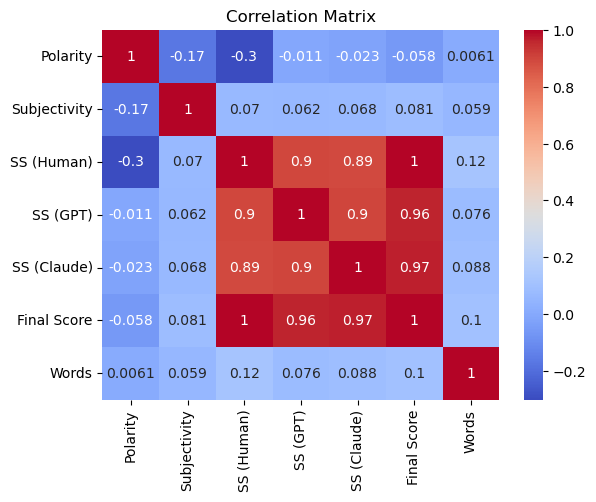

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'merged_df'
# Calculate the correlation matrix
correlation_matrix = finished_df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
finished_df.reset_index(inplace=True)

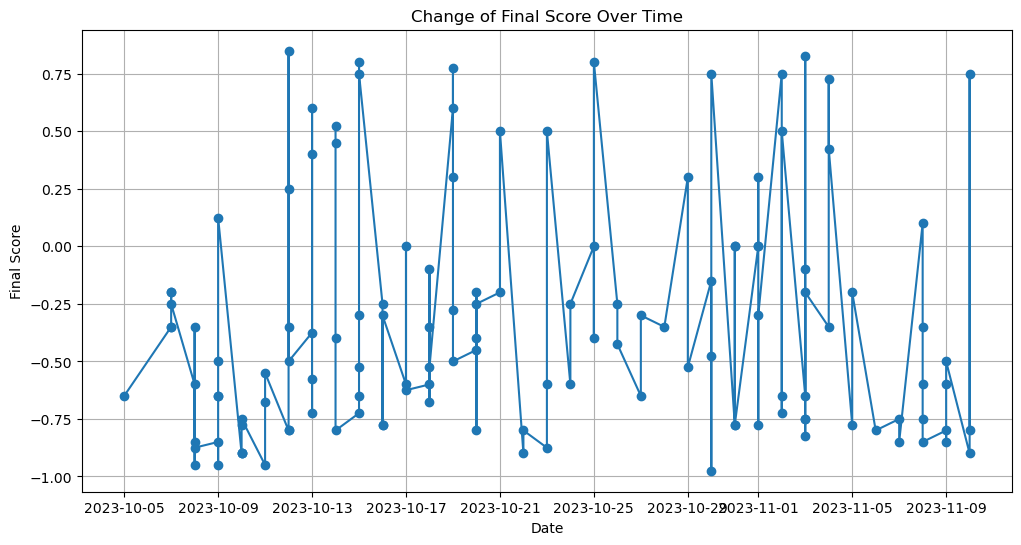

In [17]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d/%Y')  # adjust the format as per your data

# Sort the dataframe by 'Date'
finished_df.sort_values('Date', inplace=True)

# Plotting 'Final Score' over time
plt.figure(figsize=(12, 6))
plt.plot(finished_df['Date'], finished_df['Final Score'], marker='o')
plt.title('Change of Final Score Over Time')
plt.xlabel('Date')
plt.ylabel('Final Score')
plt.grid(True)
plt.show()

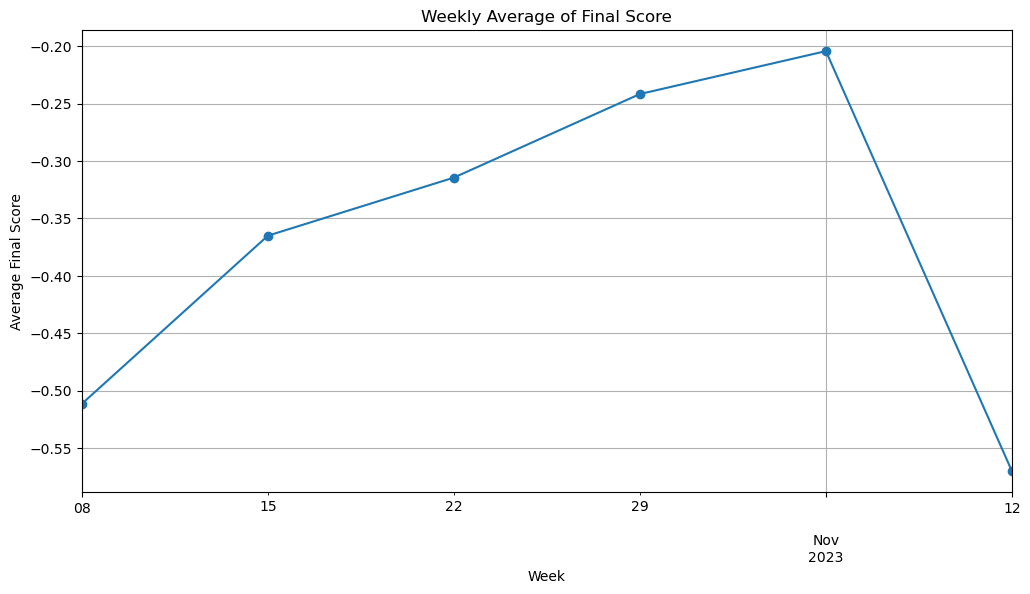

In [18]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d/%Y')
finished_df.set_index('Date', inplace=True)

# Group by week and calculate the mean 'Final Score'
weekly_scores = finished_df['Final Score'].resample('W').mean()

# Plotting weekly average 'Final Score'
plt.figure(figsize=(12, 6))
weekly_scores.plot(marker='o', linestyle='-')
plt.title('Weekly Average of Final Score')
plt.xlabel('Week')
plt.ylabel('Average Final Score')
plt.grid(True)
plt.show()

In [19]:
finished_df.reset_index(inplace=True)

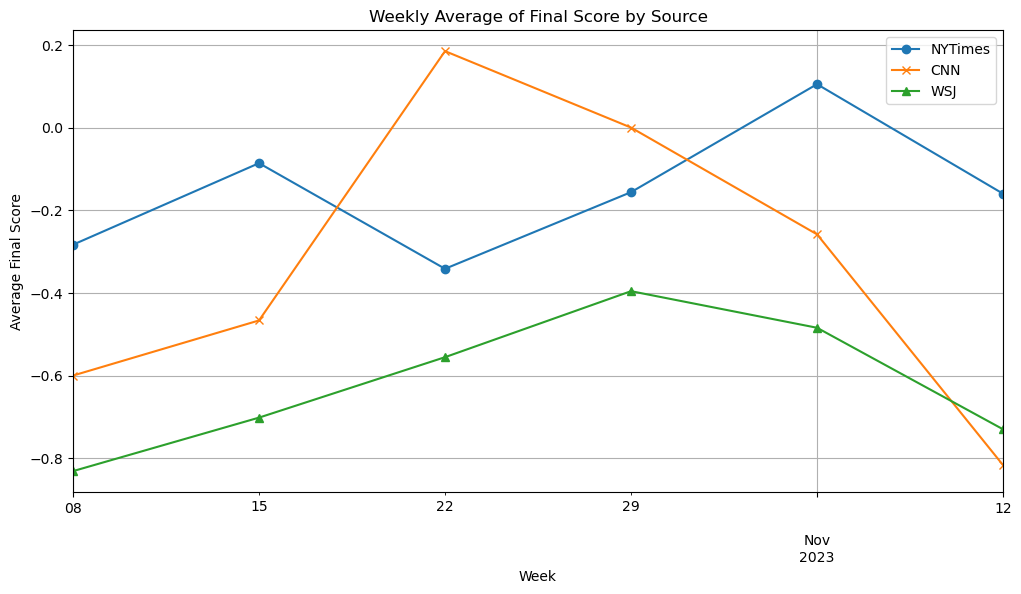

In [20]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d/%Y')
finished_df.set_index('Date', inplace=True)

# Filter dataframes by source
nytimes_df = finished_df[finished_df['Source'] == 'NYTimes']
cnn_df = finished_df[finished_df['Source'] == 'CNN']
wsj_df = finished_df[finished_df['Source'] == 'WSJ']

# Group by week and calculate mean for each source
weekly_nytimes = nytimes_df['Final Score'].resample('W').mean()
weekly_cnn = cnn_df['Final Score'].resample('W').mean()
weekly_wsj = wsj_df['Final Score'].resample('W').mean()

# Plotting weekly averages for each source
plt.figure(figsize=(12, 6))
weekly_nytimes.plot(marker='o', linestyle='-', label='NYTimes')
weekly_cnn.plot(marker='x', linestyle='-', label='CNN')
weekly_wsj.plot(marker='^', linestyle='-', label='WSJ')

plt.title('Weekly Average of Final Score by Source')
plt.xlabel('Week')
plt.ylabel('Average Final Score')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
finished_df.reset_index(inplace=True)

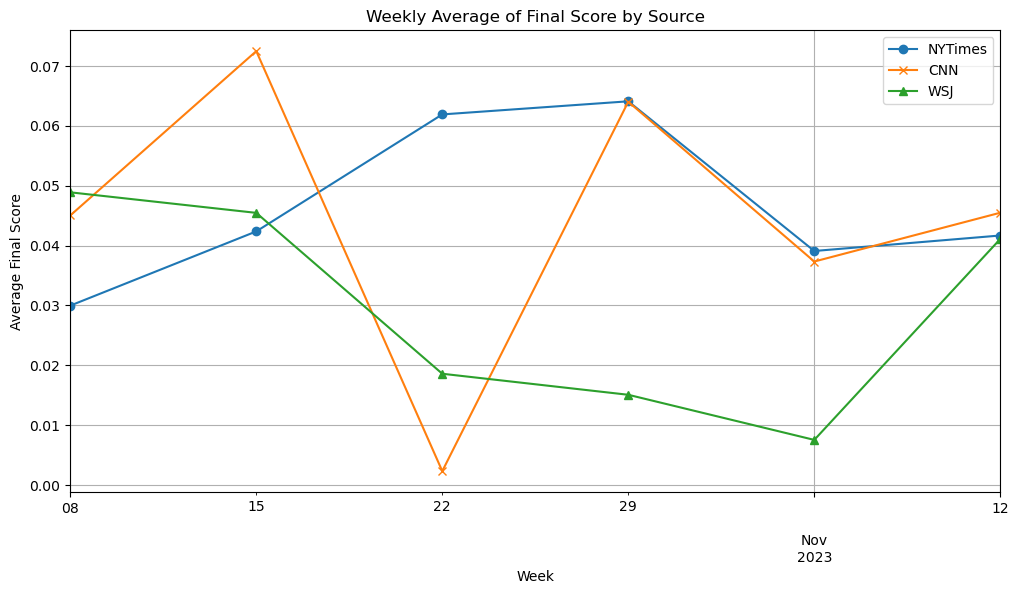

In [22]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d')

# Filter dataframes by source and resample without setting 'Date' as index
nytimes_scores = finished_df[finished_df['Source'] == 'NYTimes'].resample('W', on='Date')['Polarity'].mean()
cnn_scores = finished_df[finished_df['Source'] == 'CNN'].resample('W', on='Date')['Polarity'].mean()
wsj_scores = finished_df[finished_df['Source'] == 'WSJ'].resample('W', on='Date')['Polarity'].mean()

# Plotting
plt.figure(figsize=(12, 6))
nytimes_scores.plot(marker='o', linestyle='-', label='NYTimes')
cnn_scores.plot(marker='x', linestyle='-', label='CNN')
wsj_scores.plot(marker='^', linestyle='-', label='WSJ')

plt.title('Weekly Average of Final Score by Source')
plt.xlabel('Week')
plt.ylabel('Average Final Score')
plt.legend()
plt.grid(True)
plt.show()

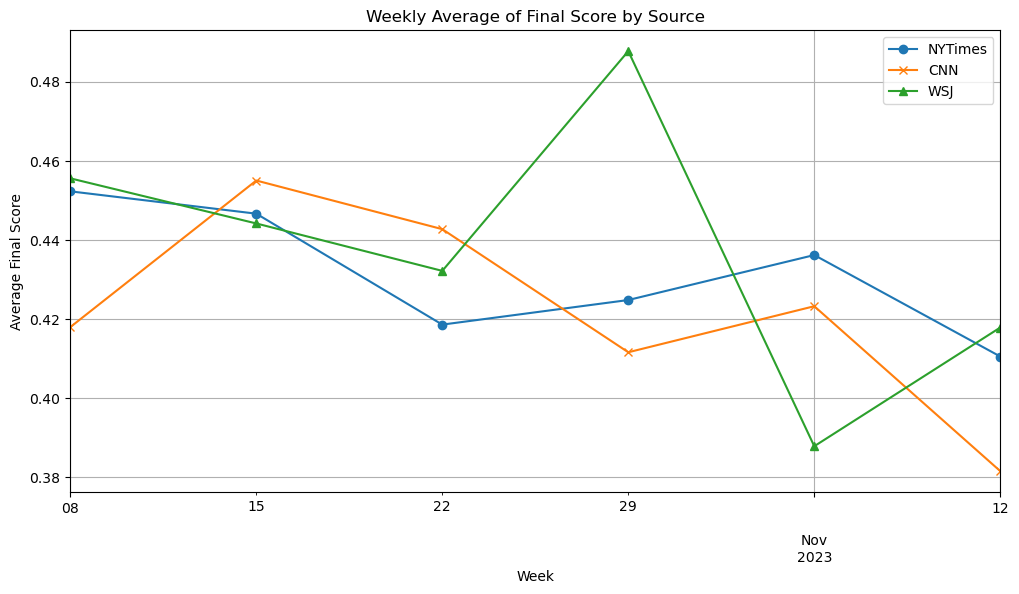

In [23]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d')

# Filter dataframes by source and resample without setting 'Date' as index
nytimes_scores = finished_df[finished_df['Source'] == 'NYTimes'].resample('W', on='Date')['Subjectivity'].mean()
cnn_scores = finished_df[finished_df['Source'] == 'CNN'].resample('W', on='Date')['Subjectivity'].mean()
wsj_scores = finished_df[finished_df['Source'] == 'WSJ'].resample('W', on='Date')['Subjectivity'].mean()

# Plotting
plt.figure(figsize=(12, 6))
nytimes_scores.plot(marker='o', linestyle='-', label='NYTimes')
cnn_scores.plot(marker='x', linestyle='-', label='CNN')
wsj_scores.plot(marker='^', linestyle='-', label='WSJ')

plt.title('Weekly Average of Final Score by Source')
plt.xlabel('Week')
plt.ylabel('Average Final Score')
plt.legend()
plt.grid(True)
plt.show()

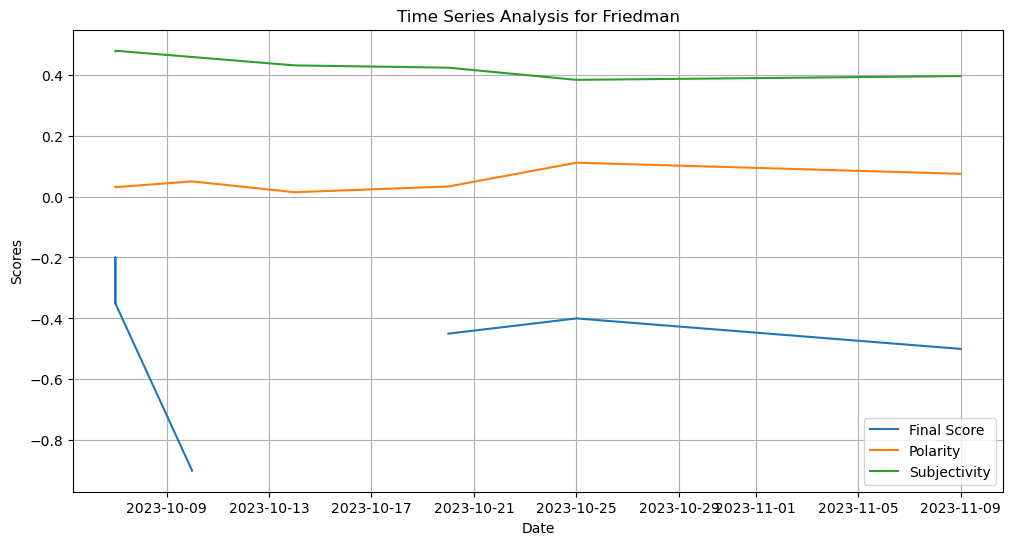

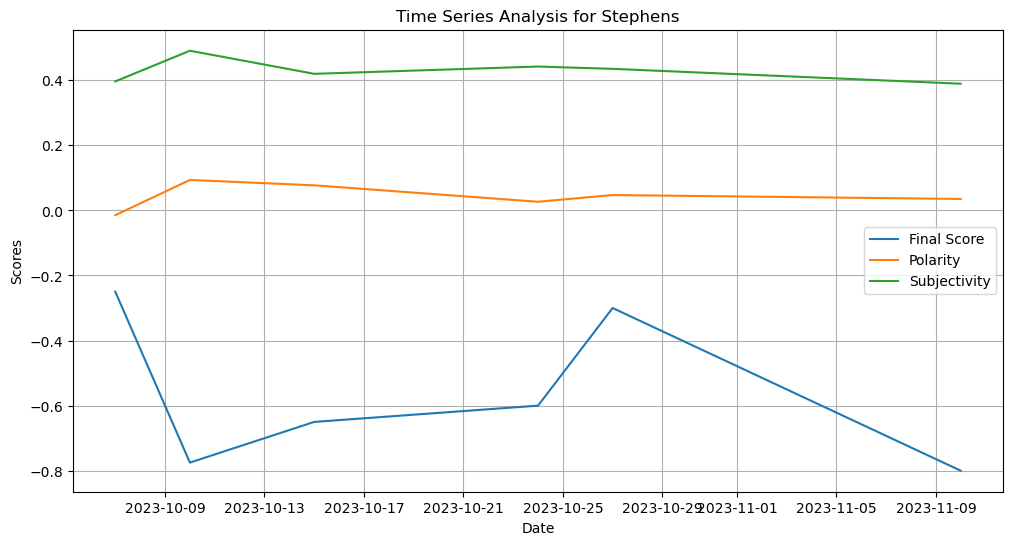

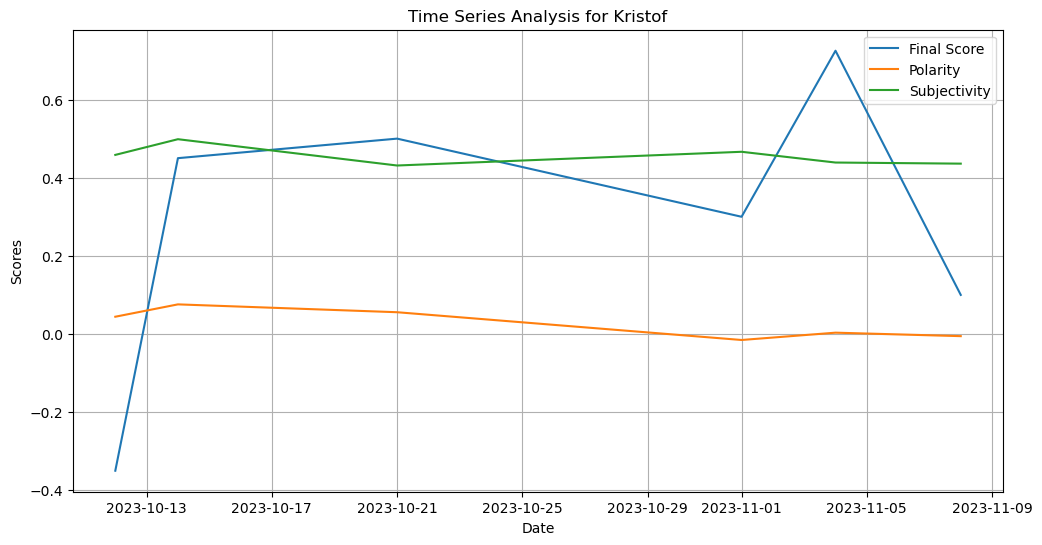

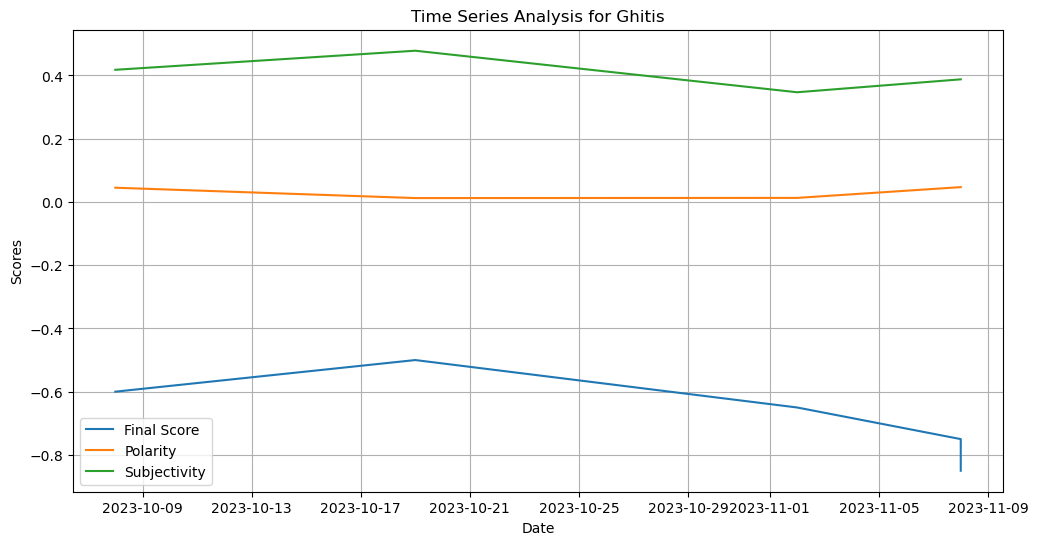

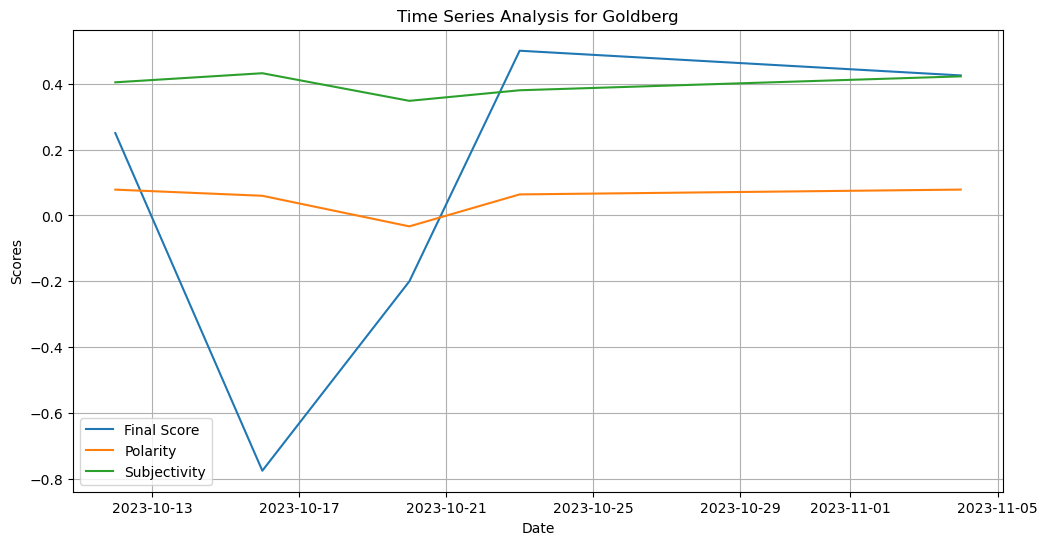

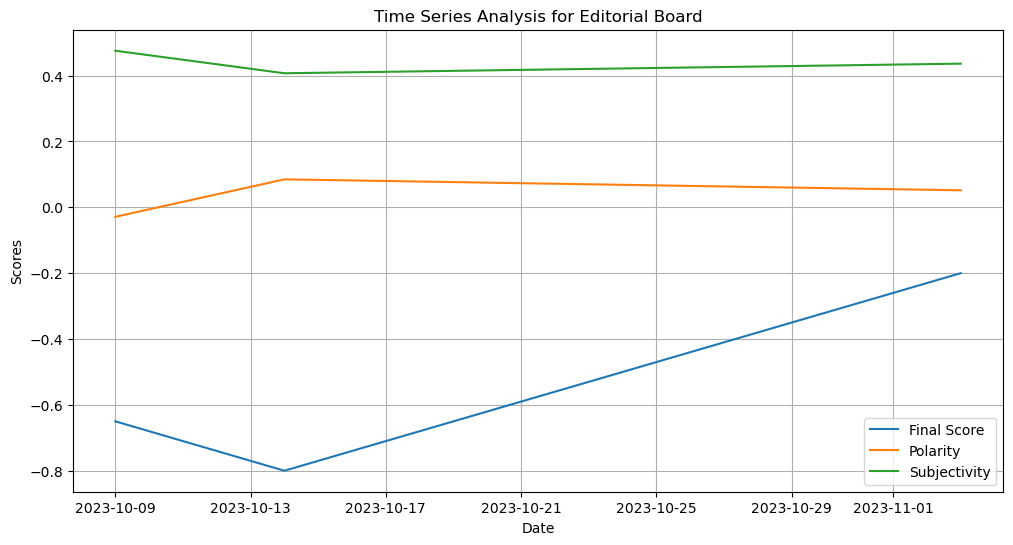

In [25]:
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d')

# List of authors to analyze
top5_authors_to_analyze = ['Friedman', 'Stephens', 'Kristof', 'Ghitis', 'Goldberg', 'Editorial Board']  # replace with actual author names

# Plotting time series for each author
for author in top5_authors_to_analyze:
    author_df = finished_df[finished_df['Author'] == author]

    plt.figure(figsize=(12, 6))
    plt.plot(author_df['Date'], author_df['Final Score'], label='Final Score')
    plt.plot(author_df['Date'], author_df['Polarity'], label='Polarity')
    plt.plot(author_df['Date'], author_df['Subjectivity'], label='Subjectivity')

    plt.title(f'Time Series Analysis for {author}')
    plt.xlabel('Date')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

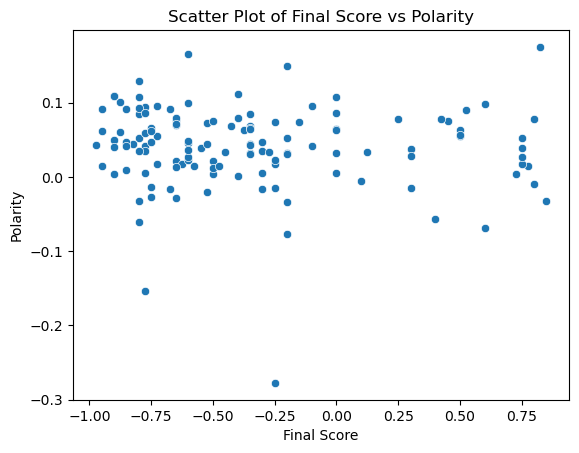

NameError: name 'stats' is not defined

In [26]:
sns.scatterplot(data=finished_df, x='Final Score', y='Polarity')
plt.title('Scatter Plot of Final Score vs Polarity')
plt.show()

# Calculating Pearson Correlation Coefficient
pearson_corr, p_value = stats.pearsonr(finished_df['Final Score'].dropna(), finished_df['Polarity'].dropna())
print(f"Pearson Correlation Coefficient: {pearson_corr}, P-value: {p_value}")

In [27]:
import pandas as pd
import numpy as np

# Assuming your dataframe is named 'finished_df'
# Convert 'Date' to datetime and set as index (if not already done)
finished_df['Date'] = pd.to_datetime(finished_df['Date'], format='%m/%d')
finished_df.set_index('Date', inplace=True)

# Publications to analyze
publications = ['NYTimes', 'WSJ', 'CNN']

# Idea 1: Comparing Extremes
for publication in publications:
    pub_df = finished_df[finished_df['Source'] == publication]
    weekly_extremes = pub_df.resample('W')['Final Score'].agg(lambda x: x.nlargest(5).mean() - x.nsmallest(5).mean())

# Idea 2: Scoring System
def calculate_score(final_score):
    if -1.0 <= final_score <= -0.5 or 0.5 <= final_score <= 1.0:
        return 1
    return 0

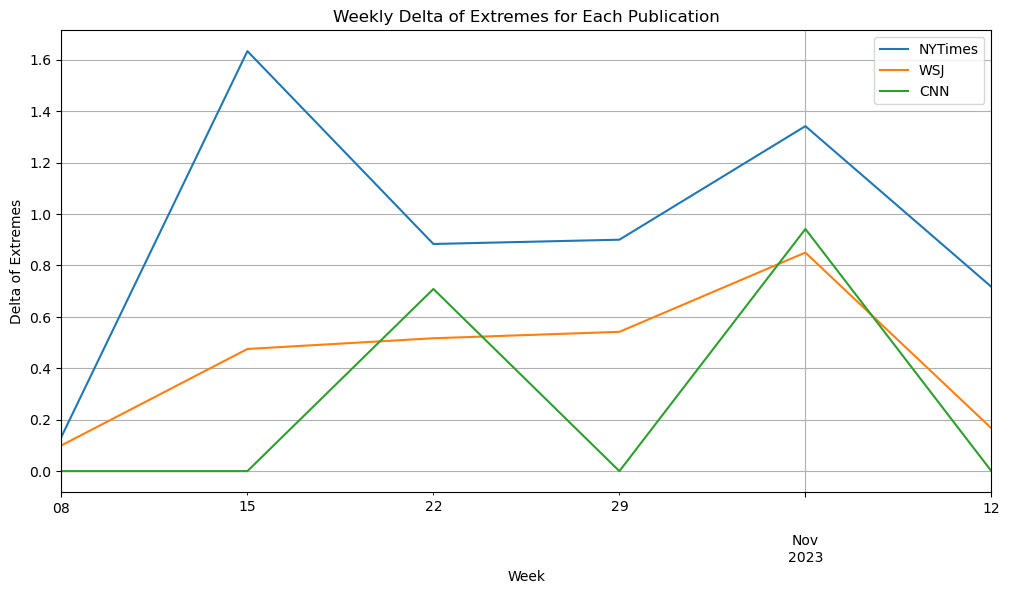

In [28]:
import matplotlib.pyplot as plt

# Visualization for Idea 1: Comparing Extremes
plt.figure(figsize=(12, 6))
for publication in publications:
    pub_df = finished_df[finished_df['Source'] == publication]
    weekly_extremes = pub_df.resample('W')['Final Score'].agg(lambda x: x.nlargest(3).mean() - x.nsmallest(3).mean())
    weekly_extremes.plot(label=publication)

plt.title('Weekly Delta of Extremes for Each Publication')
plt.xlabel('Week')
plt.ylabel('Delta of Extremes')
plt.legend()
plt.grid(True)
plt.show()



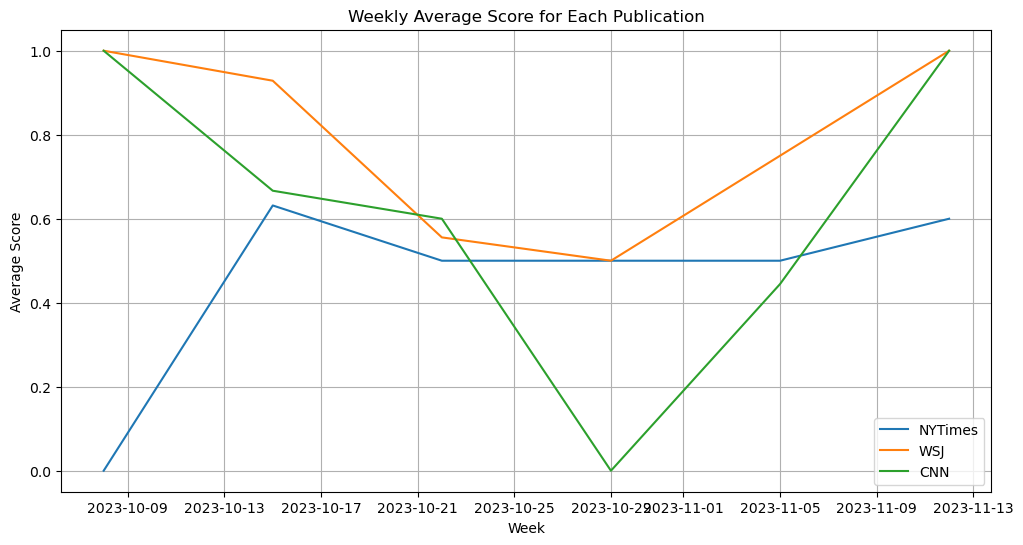

In [29]:
import matplotlib.pyplot as plt


# Assuming the 'Date' column is correctly set and 'finished_df' is your dataframe
# Define the scoring function
def calculate_score(final_score):
    if -1.0 <= final_score <= -0.5 or 0.5 <= final_score <= 1.0:
        return 1
    return 0

# Apply the scoring function
finished_df['Score'] = finished_df['Final Score'].apply(calculate_score)

# Reset index if 'Date' is set as index
finished_df.reset_index(inplace=True)

# Group by both 'Source' and 'Date', then calculate mean
weekly_scores = finished_df.groupby(['Source', pd.Grouper(freq='W', key='Date')])['Score'].mean()

# Visualization for Idea 2: Scoring System
plt.figure(figsize=(12, 6))
for publication in publications:
    # Retrieve scores for each publication
    pub_scores = weekly_scores[publication]
    plt.plot(pub_scores.index, pub_scores.values, label=publication)

plt.title('Weekly Average Score for Each Publication')
plt.xlabel('Week')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.show()

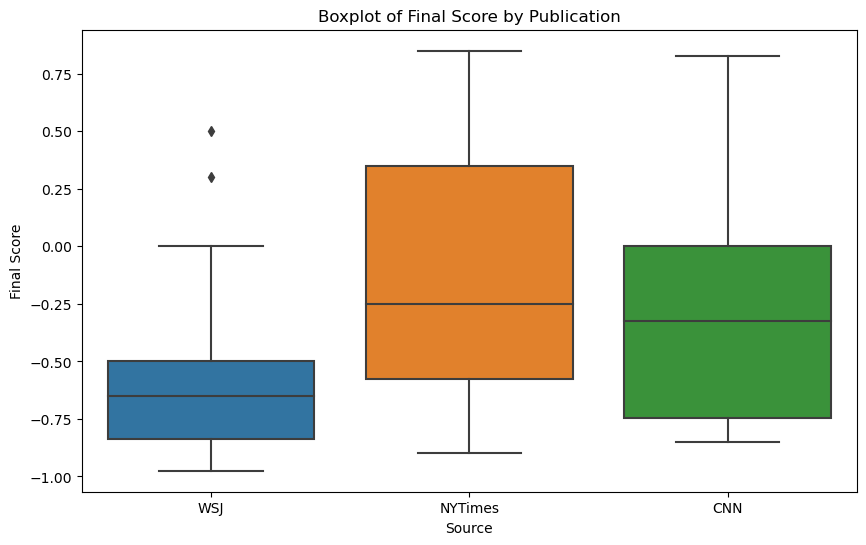

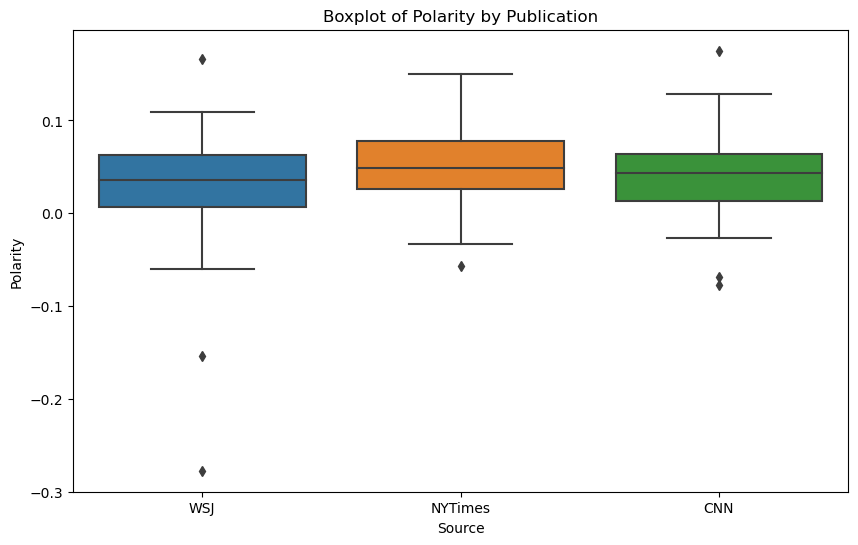

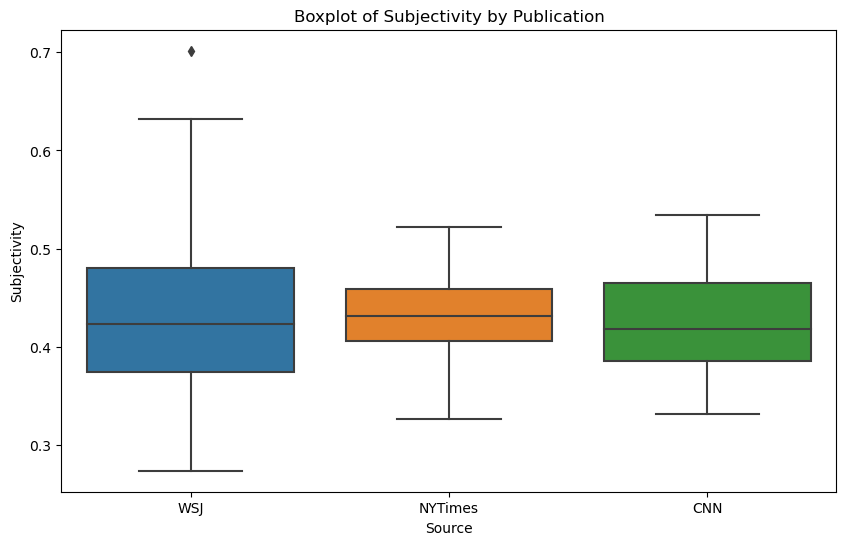

In [30]:
# Create a boxplot for 'Final Score'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Final Score', data=finished_df)
plt.title('Boxplot of Final Score by Publication')
plt.show()

# Create a boxplot for 'Polarity'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Polarity', data=finished_df)
plt.title('Boxplot of Polarity by Publication')
plt.show()

# Assuming 'Bias' is a column in your dataframe
# Create a boxplot for 'Bias'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Subjectivity', data=finished_df)
plt.title('Boxplot of Subjectivity by Publication')
plt.show()

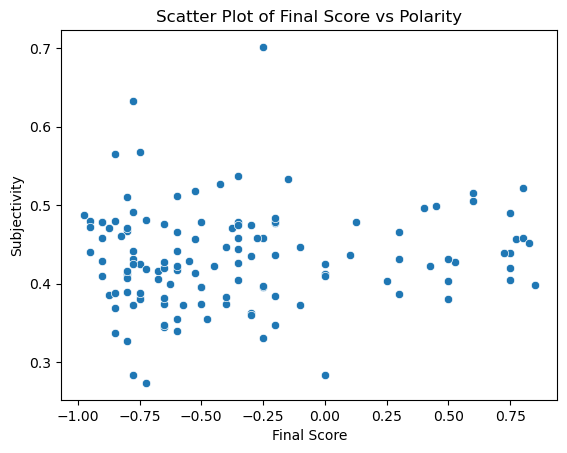

NameError: name 'stats' is not defined

In [31]:
sns.scatterplot(data=finished_df, x='Final Score', y='Subjectivity')
plt.title('Scatter Plot of Final Score vs Polarity')
plt.show()

# Calculating Pearson Correlation Coefficient
pearson_corr, p_value = stats.pearsonr(finished_df['Final Score'].dropna(), finished_df['Subjectivity'].dropna())
print(f"Pearson Correlation Coefficient: {pearson_corr}, P-value: {p_value}")

In [32]:
articles_per_publication = finished_df['Source'].value_counts()
print(articles_per_publication)

NYTimes    60
WSJ        46
CNN        22
Name: Source, dtype: int64


In [33]:
authors_per_publication = finished_df['Author'].value_counts()
print(authors_per_publication)

Friedman           9
Kristof            6
Stephens           6
Ghitis             5
Goldberg           5
Douthat            3
Editorial Board    3
Bergen             3
Moulton            3
Galant             2
Shammalah          2
French             2
Sfard              1
Stack              1
Pape               1
Ross               1
Brooks             1
Levin              1
Davidai            1
Kingsbury          1
Herzog             1
Abushaban          1
Sapiro             1
Wen                1
Zelizer            1
Zeitchik           1
Spencer            1
Edsall             1
Alyan              1
Gorenberg          1
Horn               1
Khalidi            1
Meir               1
Harden             1
Gatz               1
Cohen              1
Beinart            1
Toha               1
Manekin            1
Baskin             1
Thomas Warrick     1
Timoner            1
Stockman           1
Blow               1
Mohammed           1
Almadhoun          1
Guest              1
Name: Author,

<AxesSubplot:title={'center':'Weekly Final Score'}, xlabel='Date'>

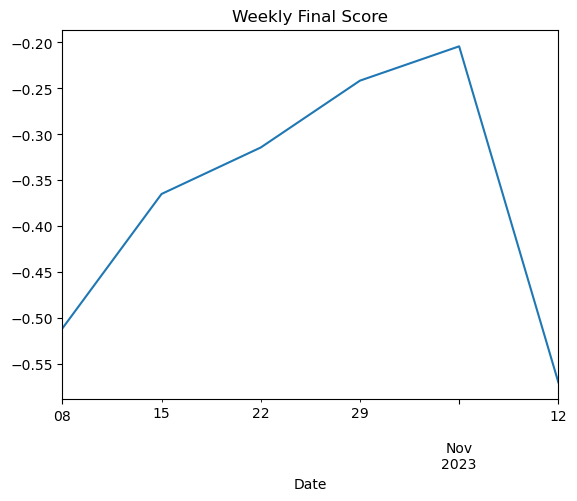

In [34]:
# Convert your date column to a datetime type if it's not already
finished_df['Date'] = pd.to_datetime(finished_df['Date'])

# Set the date as the index
finished_df.set_index('Date', inplace=True)

# Resample data by week and calculate mean 'Final Score'
weekly_final_score = finished_df['Final Score'].resample('W').mean()  # Or median(), depending on your preference

# Plot the time series
weekly_final_score.plot(kind='line', title='Weekly Final Score')

In [35]:
finished_df.reset_index(inplace=True)
